In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

traffic = pd.read_csv("/Users/jennifer/Downloads/bengaluru_traffic_signal_data.csv")
traffic.head()

,junction_id,timestamp,north,south,east,west,signal_duration
0,JCT_1,2023-01-01 00:00:00,52,41,7,17,35
1,JCT_2,2023-01-01 00:00:00,36,35,26,37,32
2,JCT_3,2023-01-01 00:00:00,39,19,64,33,39
3,JCT_4,2023-01-01 00:00:00,34,47,49,19,37
4,JCT_5,2023-01-01 00:00:00,40,21,42,41,37


In [4]:
traffic

,junction_id,timestamp,north,south,east,west,signal_duration
0,JCT_1,2023-01-01 00:00:00,52,41,7,17,35
1,JCT_2,2023-01-01 00:00:00,36,35,26,37,32
2,JCT_3,2023-01-01 00:00:00,39,19,64,33,39
3,JCT_4,2023-01-01 00:00:00,34,47,49,19,37
4,JCT_5,2023-01-01 00:00:00,40,21,42,41,37
...,...,...,...,...,...,...,...
667,JCT_3,2023-01-01 23:45:00,40,31,7,59,32
668,JCT_4,2023-01-01 23:45:00,22,27,33,18,36
669,JCT_5,2023-01-01 23:45:00,36,51,25,45,33
670,JCT_6,2023-01-01 23:45:00,32,51,39,57,32


In [6]:
traffic.shape

(672, 7)

In [8]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   junction_id      672 non-null    object
 1   timestamp        672 non-null    object
 2   north            672 non-null    int64 
 3   south            672 non-null    int64 
 4   east             672 non-null    int64 
 5   west             672 non-null    int64 
 6   signal_duration  672 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 36.9+ KB


In [10]:
traffic.isnull().sum()

junction_id        0
timestamp          0
north              0
south              0
east               0
west               0
signal_duration    0
dtype: int64

In [12]:
traffic[traffic.duplicated]

,junction_id,timestamp,north,south,east,west,signal_duration


#Convert timestamp

In [20]:
traffic['timestamp'] = pd.to_datetime(traffic['timestamp'])
traffic['hour'] = traffic['timestamp'].dt.hour
traffic['day_part'] = pd.cut(
    traffic['hour'], 
    bins=[-1, 5, 10, 16, 20, 23], 
    labels=['Late Night', 'Morning', 'Midday', 'Evening', 'Night']
)


In [22]:
traffic.head()

,junction_id,timestamp,north,south,east,west,signal_duration,hour,day_part
0,JCT_1,2023-01-01,52,41,7,17,35,0,Late Night
1,JCT_2,2023-01-01,36,35,26,37,32,0,Late Night
2,JCT_3,2023-01-01,39,19,64,33,39,0,Late Night
3,JCT_4,2023-01-01,34,47,49,19,37,0,Late Night
4,JCT_5,2023-01-01,40,21,42,41,37,0,Late Night


In [29]:
# Total vehicle count
traffic['total_vehicles'] = traffic[['north', 'south', 'east', 'west']].sum(axis=1)


In [31]:
# Grouping
hourly_avg = traffic.groupby('hour')[['north', 'south', 'east', 'west', 'total_vehicles', 'signal_duration']].mean().reset_index()
daypart_avg = traffic.groupby('day_part')[['total_vehicles', 'signal_duration']].mean().reset_index()


/var/folders/fs/vjs14dgn1gsct72b3xb5j2hw0000gn/T/ipykernel_11179/2673660748.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daypart_avg = traffic.groupby('day_part')[['total_vehicles', 'signal_duration']].mean().reset_index()


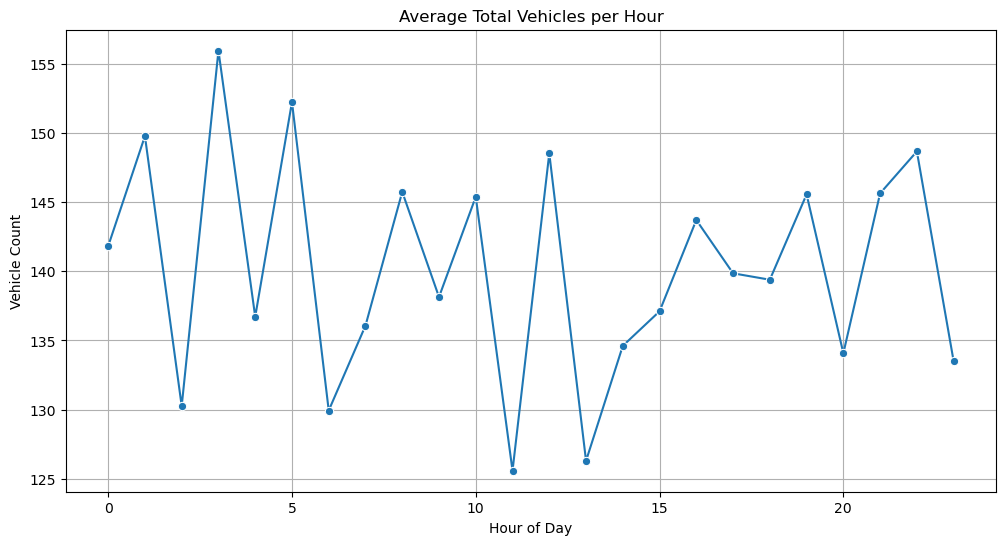

In [33]:
# 1. Average Total Vehicles per Hour
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_avg, x='hour', y='total_vehicles', marker='o')
plt.title('Average Total Vehicles per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Vehicle Count')
plt.grid(True)
plt.show()

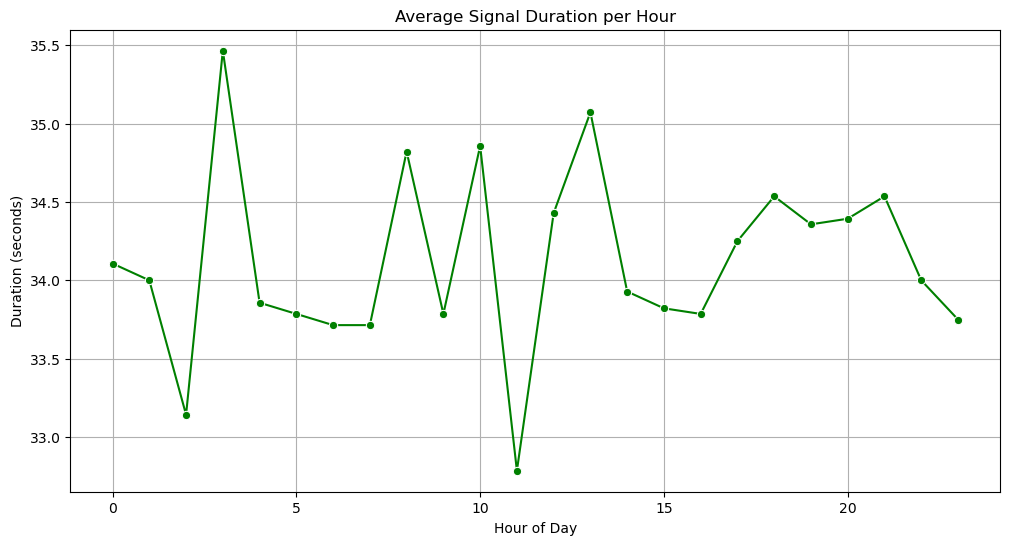

In [35]:
# 2. Average Signal Duration per Hour
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_avg, x='hour', y='signal_duration', marker='o', color='green')
plt.title('Average Signal Duration per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Duration (seconds)')
plt.grid(True)
plt.show()

/var/folders/fs/vjs14dgn1gsct72b3xb5j2hw0000gn/T/ipykernel_11179/1969890412.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daypart_avg, x='day_part', y='total_vehicles', palette='Blues')


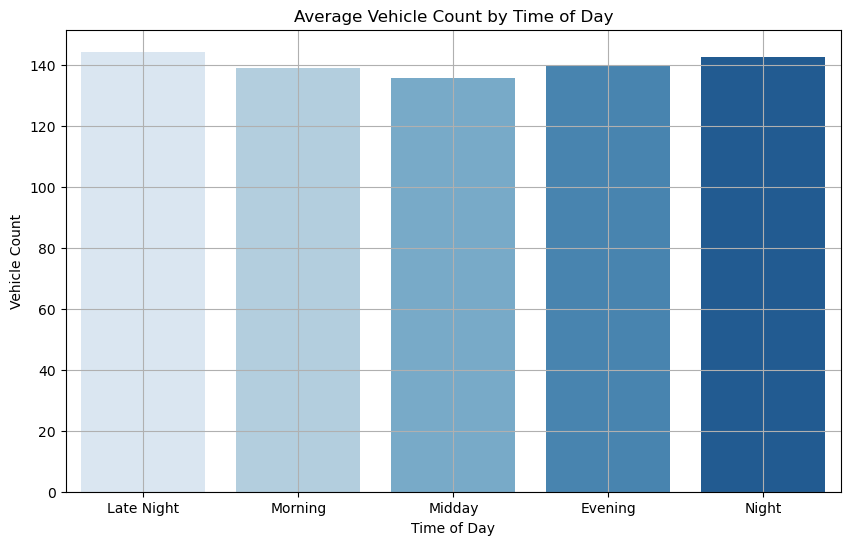

In [37]:
# 3. Average Vehicle Count by Time of Day
plt.figure(figsize=(10, 6))
sns.barplot(data=daypart_avg, x='day_part', y='total_vehicles', palette='Blues')
plt.title('Average Vehicle Count by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Vehicle Count')
plt.grid(True)
plt.show()

/var/folders/fs/vjs14dgn1gsct72b3xb5j2hw0000gn/T/ipykernel_11179/3445611435.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daypart_avg, x='day_part', y='signal_duration', palette='Greens')


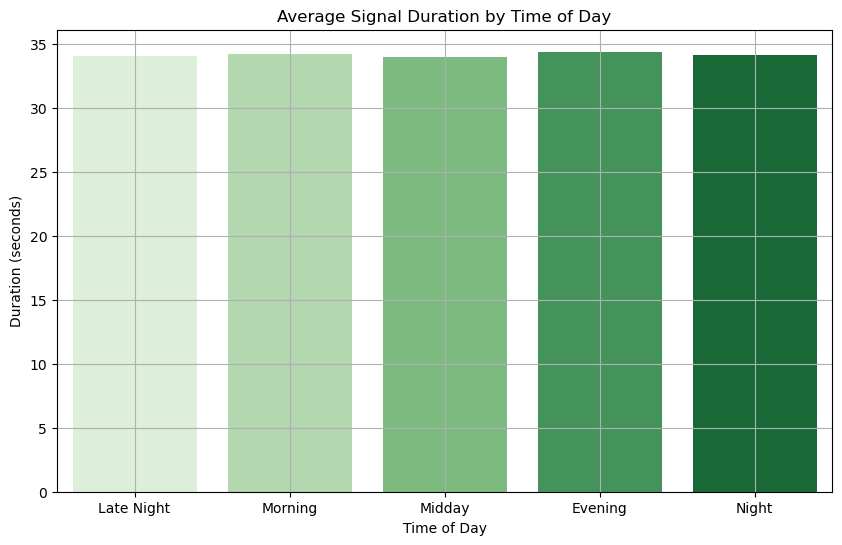

In [39]:
# 4. Average Signal Duration by Time of Day
plt.figure(figsize=(10, 6))
sns.barplot(data=daypart_avg, x='day_part', y='signal_duration', palette='Greens')
plt.title('Average Signal Duration by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Duration (seconds)')
plt.grid(True)
plt.show()


##### Feature Engineering

In [42]:
traffic['timestamp'] = pd.to_datetime(traffic['timestamp'])
traffic['hour'] = traffic['timestamp'].dt.hour
traffic['total_vehicle_count'] = traffic[['north', 'south', 'east', 'west']].sum(axis=1)


##### Model Building (ML Approach)

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = traffic[['north', 'south', 'east', 'west', 'hour']]
y = traffic['signal_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


##### Results and Evaluation

In [47]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f} seconds")


MAE: 2.69 seconds


##### Optimization Use-Case

Text(0.5, 1.0, 'Error Distribution: Actual vs Predicted Signal Duration')

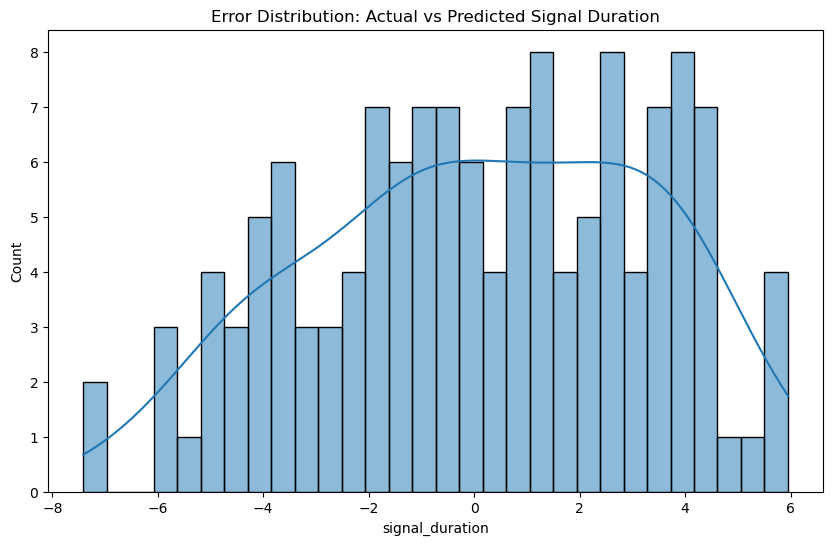

In [51]:
plt.figure(figsize=(10,6))
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.title("Error Distribution: Actual vs Predicted Signal Duration")
